In [1]:
import sys
sys.path.append('../')
from opal import SourceBasic, StageNonlinear1D
from opal.utilities.plasmaphysics import beta_matched
import numpy as np

In [2]:
# define driver
driver = SourceBasic()
driver.Q = -5e-9 # [C]
driver.E0 = 10e9 # [eV]
driver.relsigE = 0.01
driver.sigz = 20e-6 # [m]
driver.z = 120e-6 # [m]
driver.emitnx, driver.emitny = 10e-6, 10e-6 # [m rad]
driver.betax, driver.betay = 30e-3, 30e-3 # [m]
driver.Npart = 10000

# define stage
stage = StageNonlinear1D()
stage.driverSource = driver
stage.deltaE = 5.5e9 # [eV]
stage.L = 1 # [m]
stage.n0 = 2e22 # [m^-3]
stage.enableBetatron = True
stage.rampBetaMagnification = 6

# define beam
source = SourceBasic()
source.Q = -2.7e-9 # [C]
source.E0 = 3e9 # [eV]
source.relsigE = 0.005
source.sigz = 12e-6 # [m]
source.z = -60e-6 # [m]
source.emitnx = 10e-6 # [m rad]
source.emitny = 0.035e-6 # [m rad]
source.betax = stage.matchedBetaFunction(source.E0)
source.betay = source.betax
source.Npart = 10000

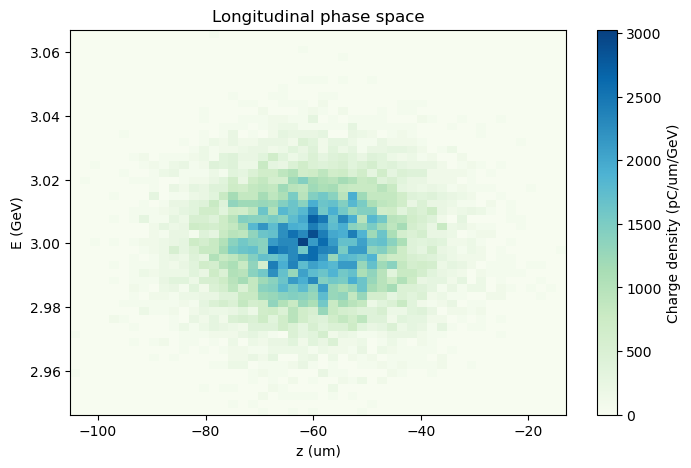

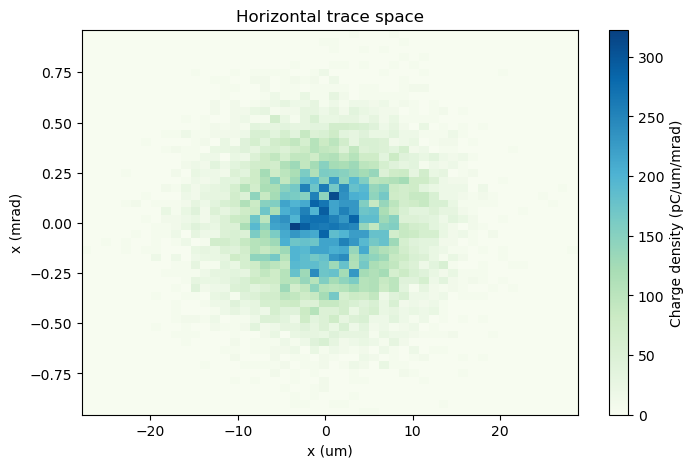

In [3]:
beam0 = source.track()
beam0.plotLPS()
beam0.plotTraceSpaceX()
beam1 = stage.track(beam0)
beam1.plotLPS()
beam1.plotTraceSpaceX()